## Calculate Mean, Median and Skewness to group each branch store

In `Correlation analysis.ipynb`, Consider an idea that there are **three group(A, B, C)** splited by their each `Weekly_Sales` value.  
Below python code calculates __<span style='background-color: #ffdce0'>Mean</span>__, __<span style='background-color: #ffdce0'>Median</span>__ and __<span style='background-color: #ffdce0'>Skewness</span>__ for each Store.

###### Reference
<U>Skewness</U> in Statistical distribution : https://www.scribbr.com/statistics/skewness/

In [1]:
import pandas as pd
from collections import defaultdict


train = pd.read_csv("../dataset/train.csv")
tmp = pd.DataFrame()
tmp["Weekly_Sales"] = train["Weekly_Sales"]
tmp["Store"] = train["Store"]


# A sales[i] is the list of Weekly_Sales values of Store 'i'.
sales = defaultdict(list)
for i in range(len(tmp)):
    sales[tmp.loc[i]["Store"]].append(tmp.loc[i]["Weekly_Sales"])

    
# Calculates Mean, Median, and Skewness.
store_num = train["Store"].max()
result = pd.DataFrame(index=list(range(1, store_num + 1)), columns=["Store", "Mean", "Median", "Skewness"])
for i in range(1, store_num + 1):
    # Store
    result.loc[i]["Store"] = i
    
    # Mean
    mean = (sum(sales[i]) / len(sales[i])).round(2)
    result.loc[i]["Mean"] = mean
    
    # Median
    result.loc[i]["Median"] = sales[i][len(sales[i]) // 2]
    
    # Skewness
    std_deviation = 0
    for val in sales[i]:
        std_deviation += (val - mean) ** 2
    std_deviation = (std_deviation / len(sales[i])) ** 0.5
    result.loc[i]["Skewness"] = 3 * (mean - result.loc[i]["Median"]) / std_deviation

result = result.sort_values(by="Median").reset_index(drop=1)
result

,Store,Mean,Median,Skewness
0,33,259675.2,243477.03,2.00589
1,44,301676.74,308950.04,-0.905892
2,5,317801.34,329183.92,-0.896832
3,36,376079.07,373703.95,0.119957
4,3,402175.74,394507.84,0.493185
5,38,384300.22,396826.06,-0.888476
6,30,438550.93,432808.48,0.747673
7,37,518331.65,500381.23,2.479284
8,16,519686.02,531080.31,-0.395891
9,7,572496.49,542295.37,0.800165


### Result

Above all, Many `Skewness` of stores are not approximately Zero (|skewness| < 0.4). Thus, We have to choose `Median`.

## Grouping
Below python code make three group. A, B and C.

<AxesSubplot:ylabel='Density'>

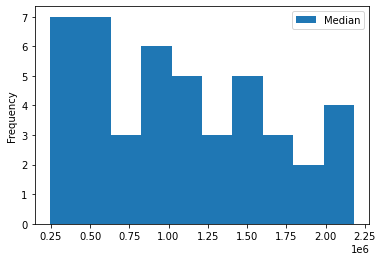

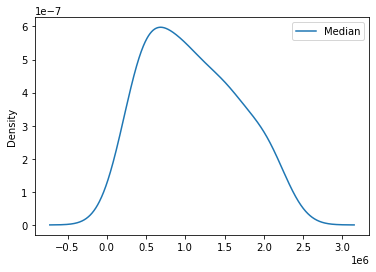

In [2]:
result.plot(kind="hist", y="Median")
result.plot(kind="kde", y="Median")

In [3]:
def find_group_member(c1, c2, data):
    """
    Args:
        c1 (float)
        c2 (float)
        
        :::: Explanation :::: 
        c1, c2 be criteria of spliting Weekly_Sales such that c1 < c2.
    
    Return:
        tuple(memberA, memberB, memberC)
        memberA (pandas.DataFrame)
        memberB (pandas.DataFrame)
        memberC (pandas.DataFrame)
        
        :::: Explanation ::::
        memberA := { S | S["Weekly_Sales"] in [c2, inf) } 
        memberB := { S | S["Weekly_Sales"] in [c1, c2)  }
        memberC := { S | S["Weekly_Sales"] in (inf, c1) }
        with S be a series in data.
    """
    memberA = data[c2 <= data['Median']].drop(["Mean", "Skewness"], axis=1).reset_index(drop=1)
    memberB = data[(c1 <= data['Median']) & (data["Median"] < c2)].drop(["Mean", "Skewness"], axis=1).reset_index(drop=1)
    memberC = data[data['Median'] < c1].drop(["Mean", "Skewness"], axis=1).reset_index(drop=1)
    return (memberA, memberB, memberC)


memberA, memberB, memberC = find_group_member(0.75*(10**6), 2.0*(10**6), result)
print("--- GroupA members ---\n", memberA, end='\n\n\n')
print("--- GroupB members ---\n", memberB, end='\n\n\n')
print("--- GroupC members ---\n", memberC, end='\n\n\n')

--- GroupA members ---
   Store      Median
0    27  2053708.01
1     4  2065377.15
2    14  2079899.47
3    20  2182246.69


--- GroupB members ---
    Store      Median
0     21   773878.58
1     45   877423.45
2     17   895020.48
3      8   929222.16
4     34   947229.24
5     35   955466.84
6     12   970328.68
7     26   1054454.4
8     40  1075687.74
9     22  1125169.92
10    32   1167757.0
11    18   1178039.0
12    41  1297584.95
13    11   1343637.0
14    28  1403779.25
15    31   1430348.1
16    19  1457345.75
17    39  1541745.59
18    24  1554837.62
19    23  1562161.97
20     1  1635078.41
21     6  1705506.29
22    10  1792210.89
23     2  1933756.21
24    13  1935593.87


--- GroupC members ---
    Store     Median
0     33  243477.03
1     44  308950.04
2      5  329183.92
3     36  373703.95
4      3  394507.84
5     38  396826.06
6     30  432808.48
7     37  500381.23
8     16  531080.31
9      7  542295.37
10    42   545109.3
11     9  587004.29
12    29  598251.5

In [4]:
def make_group(member, data):
    return data[data["Store"].isin(member["Store"])].reset_index(drop=1)


A = make_group(memberA, train)
B = make_group(memberB, train)
C = make_group(memberC, train)

A.to_csv("../dataset/groups/groupA.csv", index=False)
B.to_csv("../dataset/groups/groupB.csv", index=False)
C.to_csv("../dataset/groups/groupC.csv", index=False)


print("Group A\n", A, end="\n\n\n")
print("-" * 100)
print("Group B\n", B, end="\n\n\n")
print("-" * 100)
print("Group C\n", C)

Group A
        id  Store        Date  Temperature  Fuel_Price  Promotion1  Promotion2  \
0     418      4  05/02/2010        43.76       2.598         NaN         NaN   
1     419      4  12/02/2010        28.84       2.573         NaN         NaN   
2     420      4  19/02/2010        36.45       2.540         NaN         NaN   
3     421      4  26/02/2010        41.36       2.590         NaN         NaN   
4     422      4  05/03/2010        43.49       2.654         NaN         NaN   
..    ...    ...         ...          ...         ...         ...         ...   
551  3749     27  31/08/2012        75.00       4.026    25371.97       59.81   
552  3750     27  07/09/2012        76.00       4.076    18992.10       56.16   
553  3751     27  14/09/2012        68.72       4.088    17121.40       17.82   
554  3752     27  21/09/2012        66.10       4.203    18287.65       63.82   
555  3753     27  28/09/2012        64.92       4.158    26306.03       39.82   

     Promotion3  P

### Result
We have to choose appropriate c1, c2 to make good modeling result. 